<a href="https://colab.research.google.com/github/Hassan-zeidan/Statistics-for-Data-Science/blob/main/Week%204/Assignment%202/Apply_Logistic_Regression_to_a_Binary_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

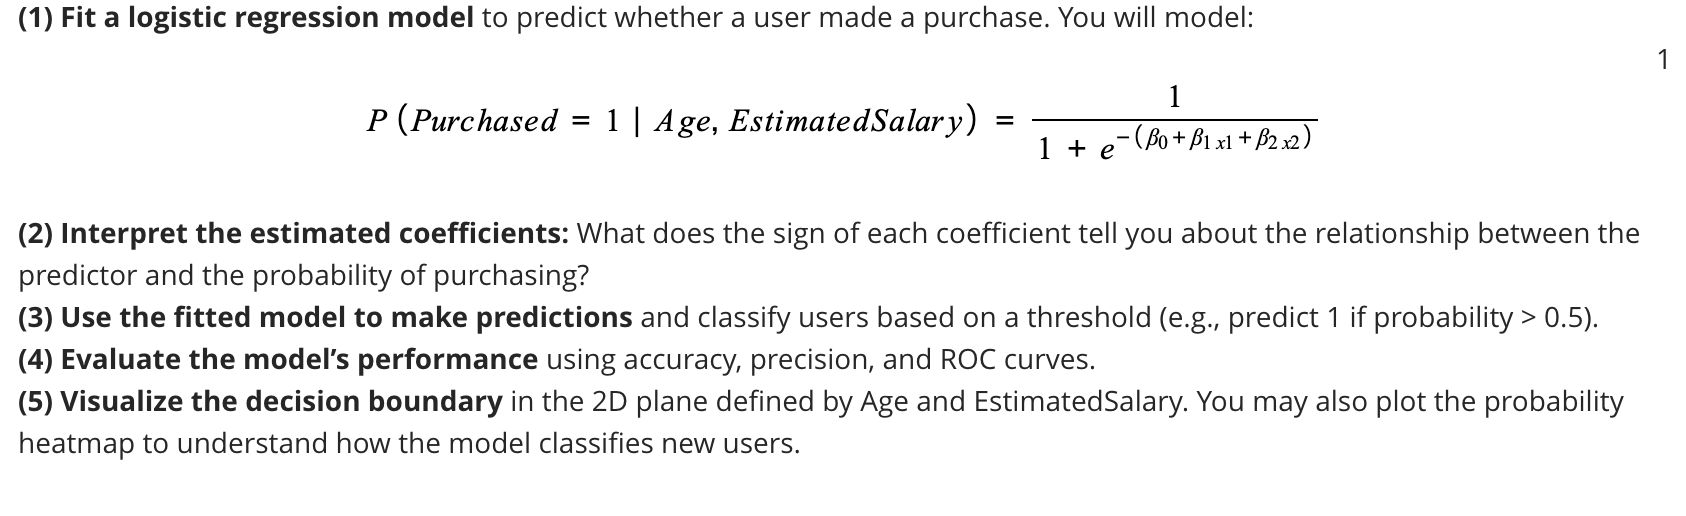

# **Part 1**

In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/Hassan-zeidan/Statistics-for-Data-Science/main/Week%204/Assignment%202/Social_Network_Ads.csv'
df = pd.read_csv(url)
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and the target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)


X_train shape: (320, 2)
X_test shape: (80, 2)


In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# **Part 2**

In [4]:
#Get the coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_[0]

print("Coefficients:", coef)
print("Intercept:", intercept)

#Calculate odds ratios
odds_ratios = np.exp(coef)
print("Odds ratios:", odds_ratios)



Coefficients: [1.96509784 1.13509021]
Intercept: -0.9950491589967495
Odds ratios: [7.13561069 3.11145421]


After training the logistic regression model, we found that both Age and EstimatedSalary have positive coefficients. This means that as a person gets older or has a higher salary, they are more likely to purchase the product. In other words, older users and those earning more money have a higher probability of saying “yes.” The odds ratios also support this: for each increase in these features, the odds of purchasing grow rather than shrink. The intercept represents the baseline likelihood of purchase when both features are at their average values. Overall, the model shows that age and salary are both important factors that increase the chances of buying.

# **Part 3**

In [5]:
y_pred = model.predict(X_test_scaled)
print("Predictions:", y_pred)

Predictions: [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]


# **Part 4**

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]


The model achieved an accuracy of 0.8625, which means it correctly predicted about 86% of the cases. The confusion matrix shows that out of all predictions, there were 50 true negatives (correctly predicted not purchasing) and 19 true positives (correctly predicted purchasing). There were 2 false positives and 9 false negatives, which means the model made only a few mistakes. Overall, the model is performing well in distinguishing between customers who will buy and those who will not.

# **Part 5**

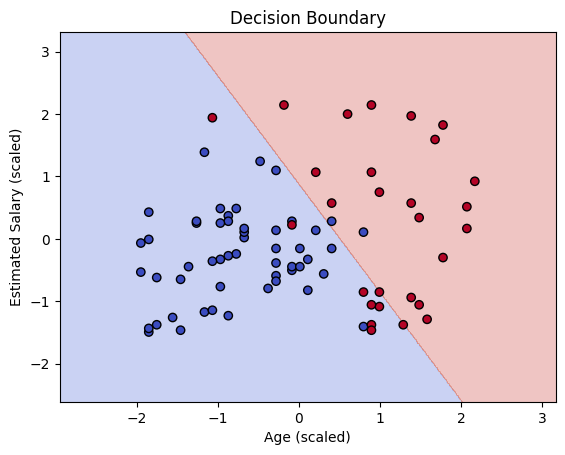

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of points covering the feature space
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

# Predict for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Decision Boundary")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()